参考资料：[1.14. 半监督学习¶](http://sklearn.apachecn.org/cn/0.19.0/modules/label_propagation.html#label-propagation)

In [54]:
import tables as tb
import numpy as np

In [2]:
path = 'E:/xdata/X.h5'
h5 = tb.open_file(path)

cifar = h5.root.cifar10

In [10]:
X = cifar.testX[:100]
Y = cifar.testY[:100]

In [6]:
import networkx as nx
%pylab inline

In [117]:
d = X.reshape((-1, 32*32*3)) / 255

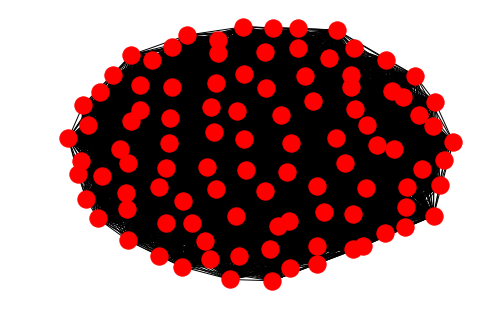

In [118]:
G = nx.complete_graph(100)

nx.draw(G)

In [128]:
np.sum(d*d, axis=1).shape

(100,)